# **CSST 106 - EXERCISE 4**

**Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science - IS - 4B

# **Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection Task: **

HOG is a feature descriptor widely used for object detection, particularly for human detection. In this exercise, you will:
Load an image containing a person or an object.



# **Step 1: Install Libraries**

In [20]:
pip install opencv-python scikit-image matplotlib

# **Step 2: Upload and Display the Image**

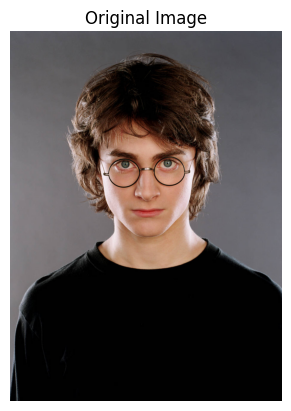

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'image01.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# **Step 3: Convert the Image to Grayscale**

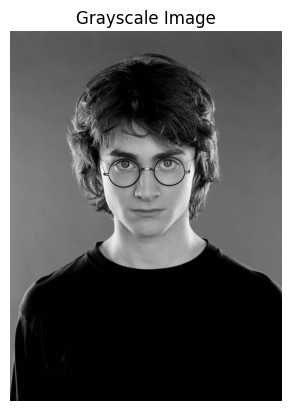

In [22]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# **Step 4: Apply the HOG Descriptor to Extract Features**

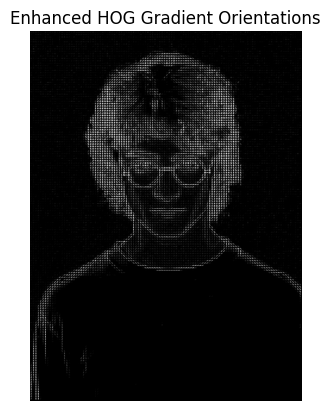

In [23]:
from skimage import exposure
import matplotlib.pyplot as plt

# Compute HOG features and a visualization of gradients
hog_features, hog_image = hog(
    gray_image,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys'
)

# Increase contrast of the HOG image for better visibility
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the enhanced HOG image
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Enhanced HOG Gradient Orientations")
plt.axis('off')
plt.show()

# **Step 5: Implement a Simple Object Detector Using HOG Features**

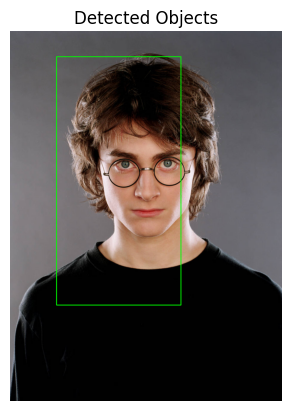

In [24]:
# Initialize HOG descriptor and SVM for human detection
hog_detector = cv2.HOGDescriptor()
hog_detector.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect objects (people in this case)
(rects, weights) = hog_detector.detectMultiScale(
    gray_image,
    winStride=(8, 8),
    padding=(16, 16),
    scale=1.05
)

# Draw bounding boxes around detected objects
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the detection results
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects")
plt.axis('off')
plt.show()

# **FINAL STEP FOR HOG: SIDE BY SIDE COMPARISON**

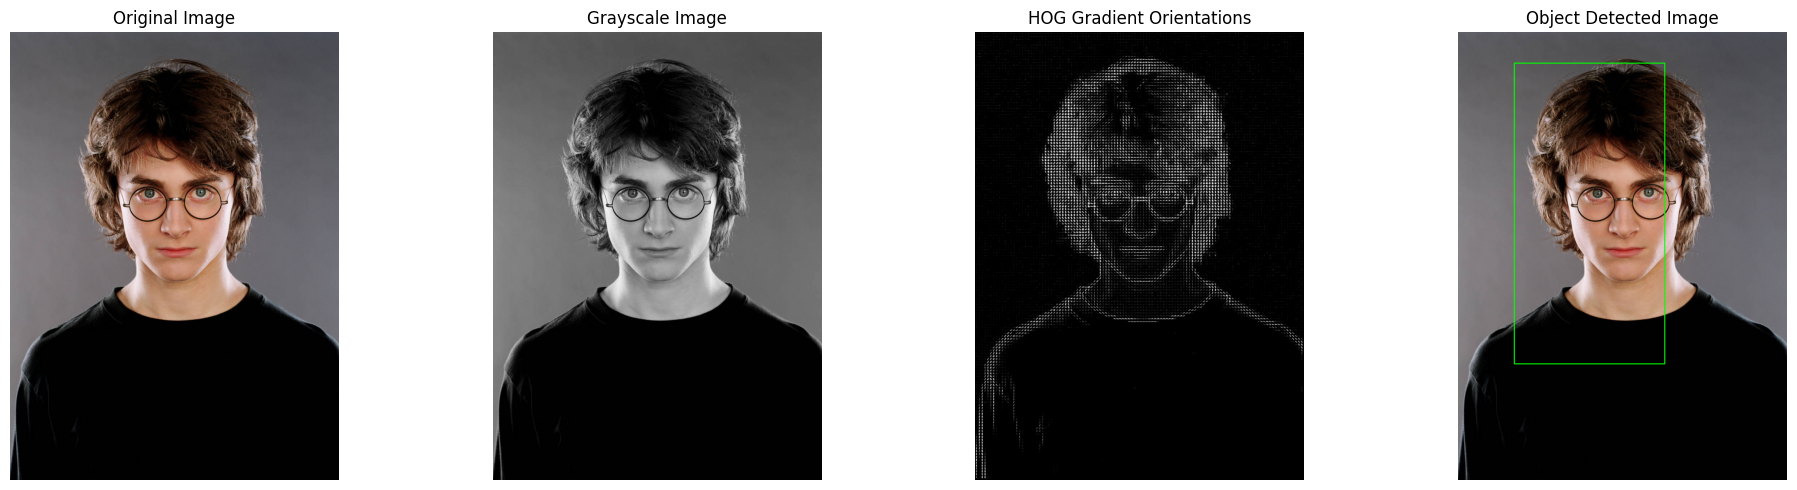

In [25]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Specify the path to your image
image_path = 'image01.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image. Please check the image path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute HOG features and visualize gradient orientations
    hog_features, hog_image = hog(
        gray_image,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        orientations=9,
        visualize=True,
        block_norm='L2-Hys'
    )

    # Enhance contrast of HOG image for better visibility
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Initialize HOG descriptor and SVM for human detection
    hog_detector = cv2.HOGDescriptor()
    hog_detector.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect objects (e.g., people) in the grayscale image
    (rects, weights) = hog_detector.detectMultiScale(
        gray_image,
        winStride=(8, 8),
        padding=(16, 16),
        scale=1.05
    )

    # Draw bounding boxes around detected objects
    detected_image = image.copy()
    for (x, y, w, h) in rects:
        cv2.rectangle(detected_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert BGR images to RGB for display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

    # Display the images side by side
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Original Image
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Grayscale Image
    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title("Grayscale Image")
    axes[1].axis('off')

    # HOG Image
    axes[2].imshow(hog_image_rescaled, cmap='gray')
    axes[2].set_title("HOG Gradient Orientations")
    axes[2].axis('off')

    # Object Detected Image
    axes[3].imshow(detected_image_rgb)
    axes[3].set_title("Object Detected Image")
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

# **Exercise 2: YOLO (You Only Look Once) Object Detection  Task: **

YOLO is a deep learning-based object detection method. In this exercise, you will:

• Load a pre-trained YOLO model using TensorFlow.

• Feed an image to the YOLO model for object detection.

• Visualize the bounding boxes and class labels on the detected objects in the image.

• Test the model on multiple images to observe its performance.

# **Step 1: Install Necessary Packages**


In [26]:
pip install tensorflow opencv-python matplotlib

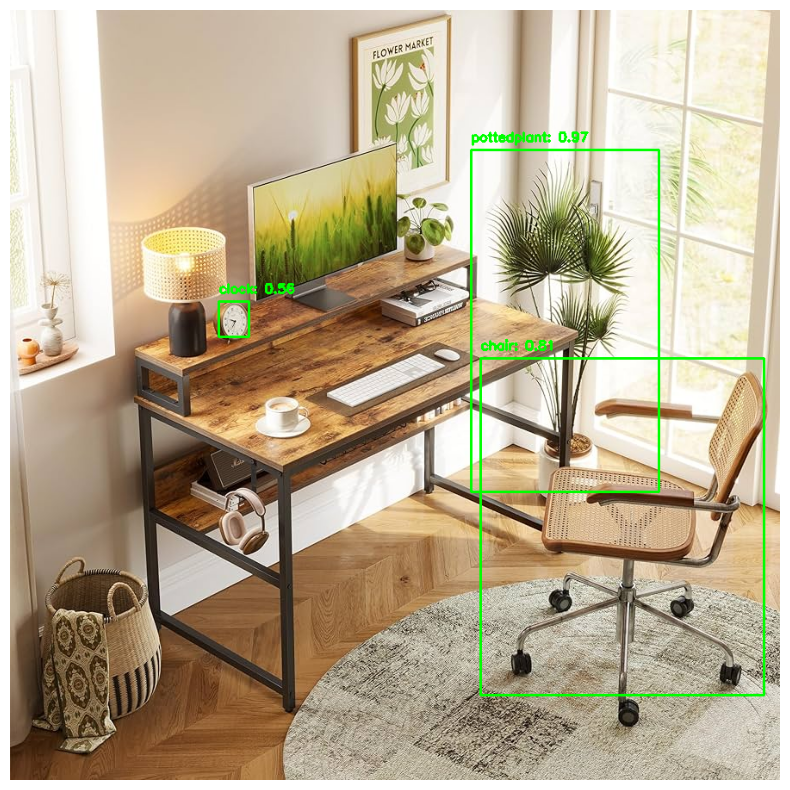

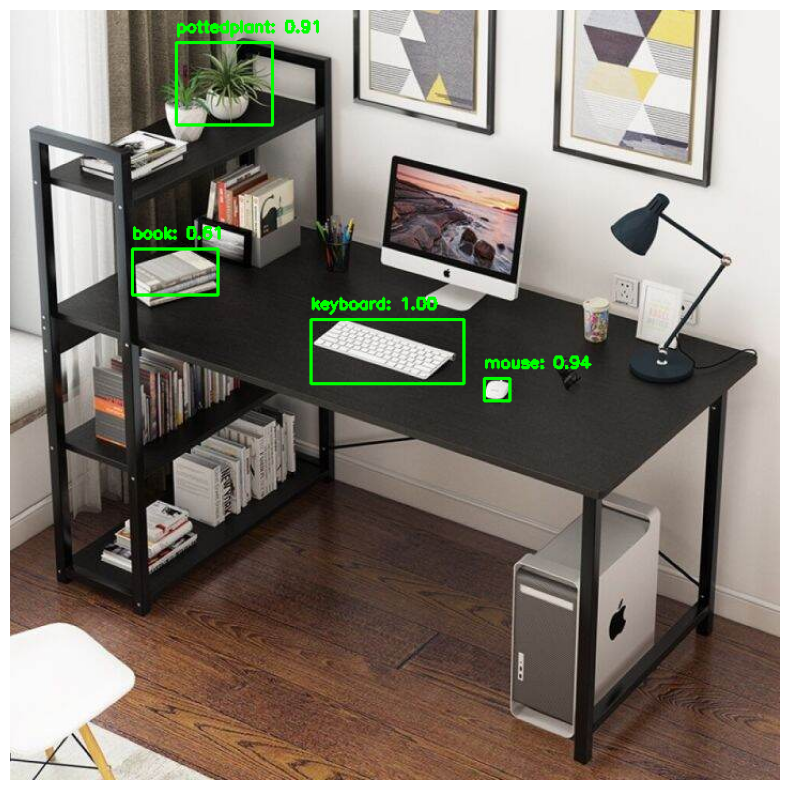

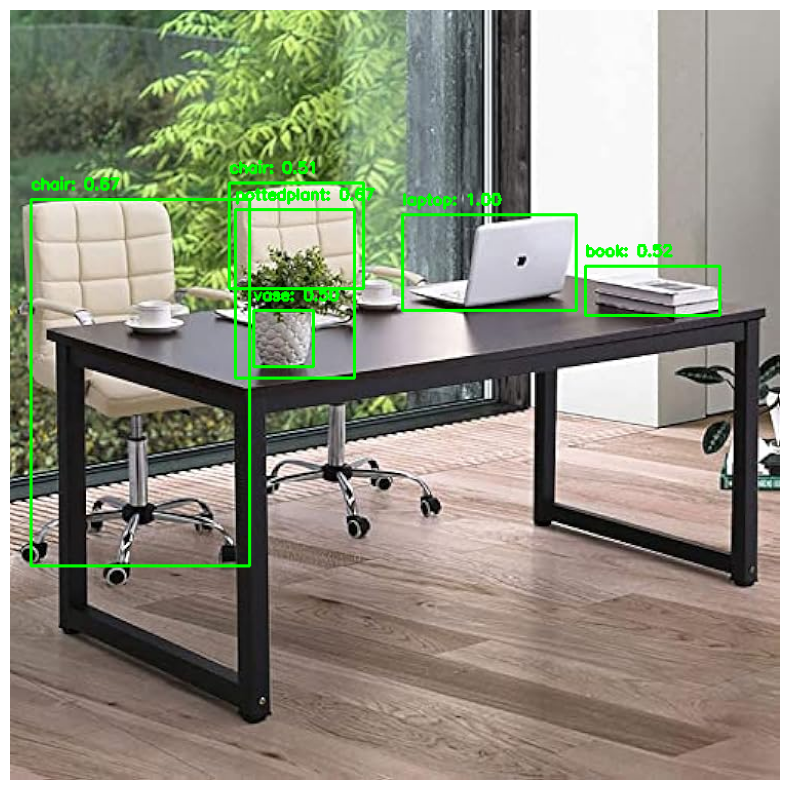

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to your YOLO configuration, weight files, and COCO names
config_path = 'yolov3.cfg'       # Replace with the path to your YOLO config file
weights_path = 'yolov3.weights'  # Replace with the path to your YOLO weights file
names_path = 'coco.names'        # Replace with the path to your COCO names file

# Load class labels
with open(names_path, 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]

# Load the YOLO network with OpenCV
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Define a function for detecting objects using YOLO
def detect_objects(image):
    height, width = image.shape[:2]

    # Preprocess the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get the output layer names
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

    # Run the forward pass
    outputs = net.forward(output_layers)

    # Initialize lists for detected bounding boxes, confidences, and class IDs
    boxes = []
    confidences = []
    class_ids = []

    # Process each output
    for output in outputs:
        for detection in output:
            scores = detection[5:]  # Skip the first 5 elements
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filter out low confidence detections
            if confidence > 0.5:
                # Scale the bounding box coordinates to the original image size
                box = detection[0:4] * np.array([width, height, width, height])
                center_x, center_y, w, h = box.astype('int')

                # Calculate top-left corner coordinates
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # Append to the lists
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Perform non-max suppression to remove redundant overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Draw bounding boxes and labels
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{class_labels[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Test the model on multiple images
image_paths = ['image05.jpg', 'image04.jpg', 'image06.jpg']  # Update with your actual image file names
for path in image_paths:
    # Load the image and check if it's loaded correctly
    image = cv2.imread(path)
    if image is None:
        print(f"Error: Could not load image at path: {path}")
        continue

    # Perform object detection
    detected_image = detect_objects(image)

    # Convert to RGB for displaying with matplotlib
    detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

    # Display the image with detected objects
    plt.figure(figsize=(10, 10))
    plt.imshow(detected_image_rgb)
    plt.axis('off')
    plt.show()


# **Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow Task: **

SSD is a real-time object detection method. For this exercise:

• Load an image of your choice.

• Utilize the TensorFlow Object Detection API to apply the SSD model.

• Detect objects within the image and draw bounding boxes around them.

• Compare the results with those obtained from the YOLO model.


In [30]:
!pip install tensorflow
!pip install tensorflow-hub

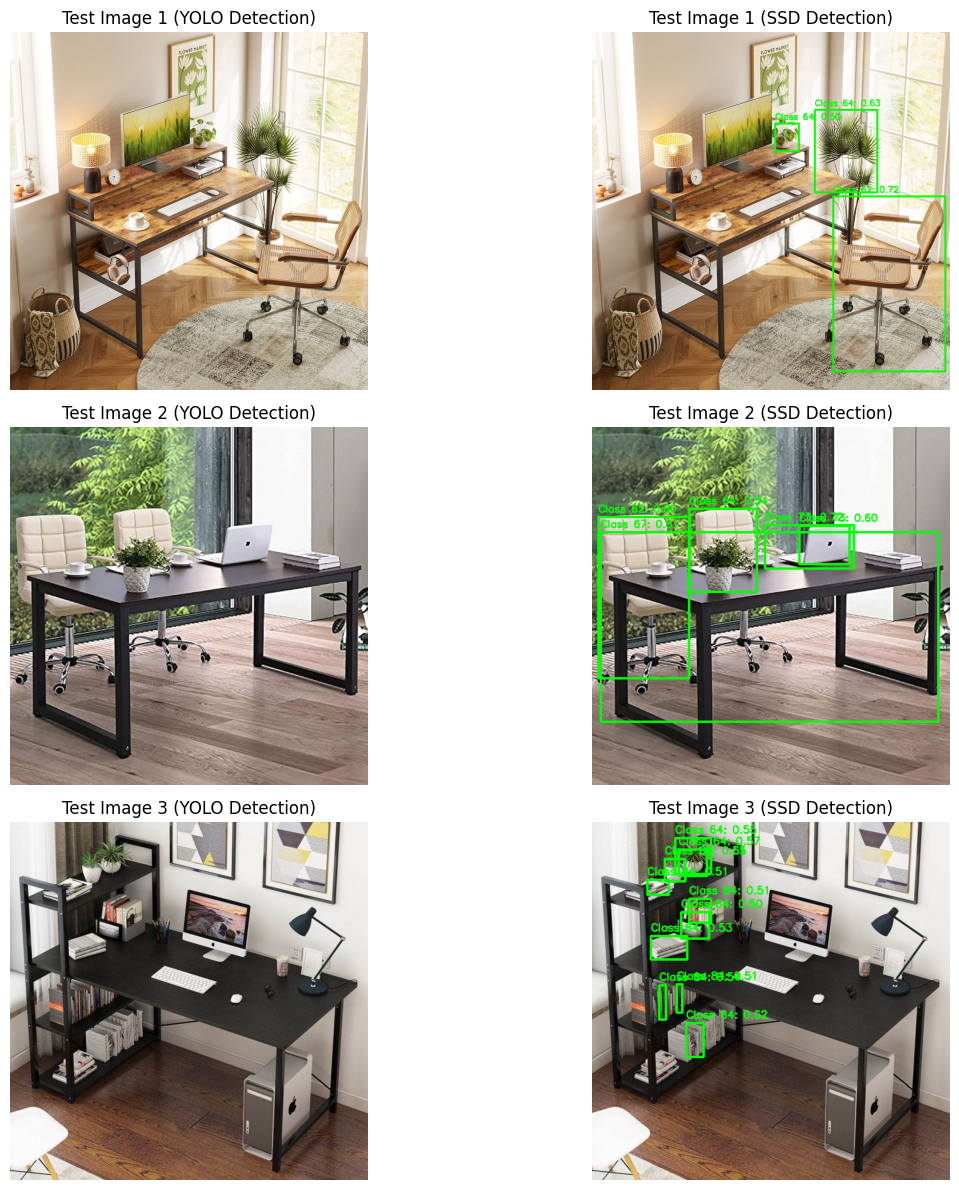

In [40]:
# Import Libraries.
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the SSD model from TensorFlow Hub.
ssd_model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def detect_objects(image_path):
    # Load image.
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at the specified path: {image_path}")

    # Convert to RGB.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # Simulate YOLO detection (placeholder).
    # Here, add your YOLO model detection code if available.
    # If not, for demonstration, you can return the original image.
    return image_rgb  # Replace this with actual YOLO detection logic if you have it.

def detect_objects_ssd(image_path):
    # Load image.
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at the specified path: {image_path}")

    # Convert to RGB.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # Preprocess image for SSD model.
    input_tensor = tf.image.resize(image_rgb, (300, 300))
    input_tensor = tf.cast(input_tensor, dtype=tf.uint8)  # Convert to uint8.
    input_tensor = tf.expand_dims(input_tensor, axis=0)  # Add batch dimension.

    # Perform SSD detection.
    detections = ssd_model(input_tensor)

    # Extract results.
    detection_boxes = detections['detection_boxes'][0].numpy()
    detection_scores = detections['detection_scores'][0].numpy()
    detection_classes = detections['detection_classes'][0].numpy().astype(int)

    # Define confidence threshold.
    confidence_threshold = 0.5

    # Draw bounding boxes on the image.
    for i in range(len(detection_scores)):
        if detection_scores[i] >= confidence_threshold:
            box = detection_boxes[i]
            y_min, x_min, y_max, x_max = int(box[0] * height), int(box[1] * width), int(box[2] * height), int(box[3] * width)

            # Draw bounding box and label.
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
            label = f"Class {detection_classes[i]}: {detection_scores[i]:.2f}"
            cv2.putText(image_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    return image_rgb

# Multiple images to test SSD and compare with YOLO.
image_paths = [
    'image05.jpg',
    'image06.jpg',
    'image04.jpg'
]

# Visualization.
plt.figure(figsize=(14, 12))

for i, path in enumerate(image_paths, 1):
    # YOLO detection.
    yolo_detected_image = detect_objects(path)

    # SSD detection.
    ssd_detected_image = detect_objects_ssd(path)

    # Display YOLO result.
    plt.subplot(len(image_paths), 2, 2 * i - 1)
    plt.imshow(yolo_detected_image)
    plt.axis('off')
    plt.title(f"Test Image {i} (YOLO Detection)")

    # Display SSD result.
    plt.subplot(len(image_paths), 2, 2 * i)
    plt.imshow(ssd_detected_image)
    plt.axis('off')
    plt.title(f"Test Image {i} (SSD Detection)")

plt.tight_layout()
plt.show()

# **Exercise 4: Traditional vs. Deep Learning Object Detection Comparison Task:**

Compare traditional object detection (e.g., HOG-SVM) with deep learning-based methods (YOLO, SSD):


Implement HOG-SVM and either YOLO or SSD for the same dataset.

Compare their performances in terms of accuracy and speed.

Document the advantages and disadvantages of each method.



HOG-SVM detection completed in 1.7325 seconds for image04.jpg.
SSD detection completed in 3.7432 seconds for image04.jpg.
HOG-SVM detection completed in 2.4496 seconds for image05.jpg.
SSD detection completed in 0.0861 seconds for image05.jpg.


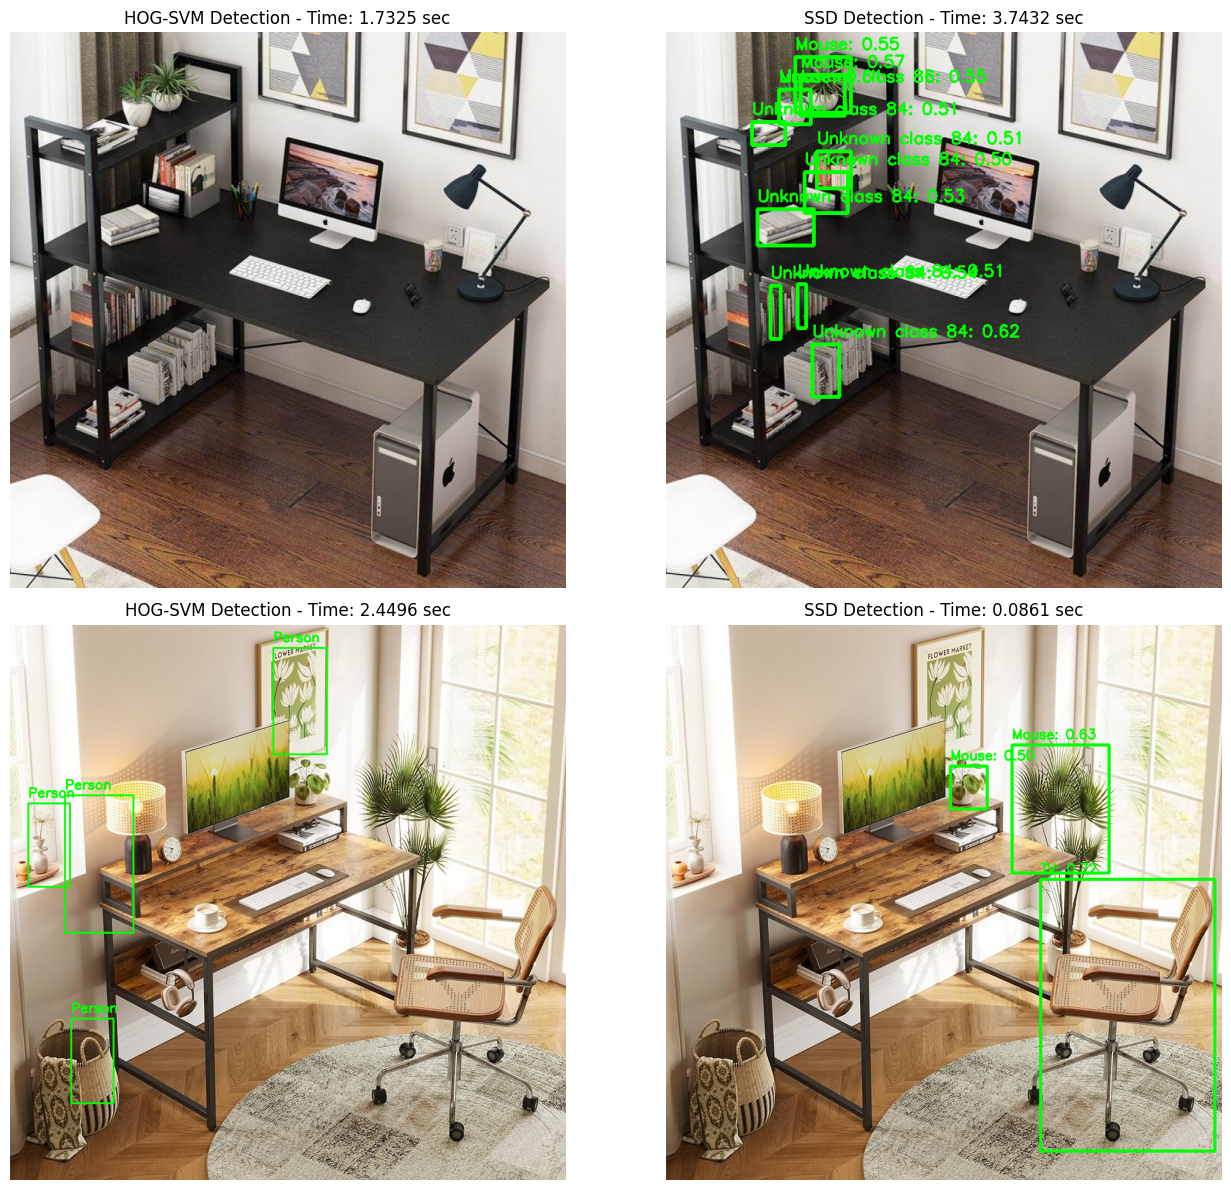

In [56]:
# Import Libraries
import cv2
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import tensorflow_hub as hub

# Load the SSD model from TensorFlow Hub
ssd_model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Initialize HOG descriptor with default people detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Define a mapping from class indices to labels (for SSD)
class_labels = {0: "Person", 1: "Bicycle", 2: "Car", 3: "Motorcycle", 4: "Airplane",
                5: "Bus", 6: "Train", 7: "Truck", 8: "Boat", 9: "Traffic Light",
                10: "Fire Hydrant", 11: "Stop Sign", 12: "Parking Meter",
                13: "Bench", 14: "Bird", 15: "Cat", 16: "Dog", 17: "Horse",
                18: "Sheep", 19: "Cow", 20: "Elephant", 21: "Bear",
                22: "Zebra", 23: "Giraffe", 24: "Backpack", 25: "Umbrella",
                26: "Handbag", 27: "Tie", 28: "Suitcase", 29: "Frisbee",
                30: "Skis", 31: "Snowboard", 32: "Sports Ball", 33: "Kite",
                34: "Baseball Bat", 35: "Baseball Glove", 36: "Skateboard",
                37: "Surfboard", 38: "Tennis Racket", 39: "Bottle",
                40: "Wine Glass", 41: "Cup", 42: "Fork", 43: "Knife",
                44: "Spoon", 45: "Bowl", 46: "Banana", 47: "Apple",
                48: "Sandwich", 49: "Orange", 50: "Broccoli", 51: "Carrot",
                52: "Hot Dog", 53: "Pizza", 54: "Donut", 55: "Cake",
                56: "Chair", 57: "Couch", 58: "Potted Plant", 59: "Bed",
                60: "Dining Table", 61: "Toilet", 62: "TV", 63: "Laptop",
                64: "Mouse", 65: "Remote", 66: "Keyboard", 67: "Cell Phone",
                68: "Microwave", 69: "Oven", 70: "Toaster", 71: "Sink",
                72: "Refrigerator", 73: "Book", 74: "Clock", 75: "Vase",
                76: "Scissors", 77: "Teddy Bear", 78: "Hair Drier", 79: "Toothbrush"}

# HOG-SVM Detection Function
def detect_objects_hog(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at the specified path: {image_path}")

    # Convert image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Start timing
    start_time = time.time()

    # Detect people in the image using HOG-SVM
    (rects, weights) = hog.detectMultiScale(image_gray, winStride=(4, 4), padding=(8, 8), scale=1.05)

    # End timing
    end_time = time.time()
    hog_time = end_time - start_time

    # Draw bounding boxes and labels for HOG-SVM
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, "Person", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print(f"HOG-SVM detection completed in {hog_time:.4f} seconds for {image_path}.")
    return image, hog_time

# SSD Detection Function
def detect_objects_ssd(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at the specified path: {image_path}")

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # Resize image to 300x300, expected by SSD model
    input_tensor = tf.image.resize_with_pad(image_rgb, 300, 300)
    input_tensor = tf.cast(input_tensor, dtype=tf.uint8)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    # Start timing
    start_time = time.time()

    # Run SSD model
    detections = ssd_model(input_tensor)

    # End timing
    end_time = time.time()
    ssd_time = end_time - start_time

    # Extract detection results
    detection_boxes = detections['detection_boxes'][0].numpy()
    detection_scores = detections['detection_scores'][0].numpy()
    detection_classes = detections['detection_classes'][0].numpy().astype(int)

    # Set a confidence threshold
    confidence_threshold = 0.5

    # Draw bounding boxes on the image
    for i in range(len(detection_scores)):
        if detection_scores[i] >= confidence_threshold:
            box = detection_boxes[i]
            y_min, x_min, y_max, x_max = (int(box[0] * height), int(box[1] * width),
                                           int(box[2] * height), int(box[3] * width))
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
            class_index = detection_classes[i]

            # Check if the class index is in our dictionary
            if class_index in class_labels:
                label = f"{class_labels[class_index]}: {detection_scores[i]:.2f}"
            else:
                label = f"Unknown class {class_index}: {detection_scores[i]:.2f}"
                print(f"Warning: Detected class index {class_index} is not in class_labels")

            cv2.putText(image_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print(f"SSD detection completed in {ssd_time:.4f} seconds for {image_path}.")
    return image_rgb, ssd_time

# Multiple images to test HOG-SVM and SSD
image_paths = [
    'image04.jpg',
    'image05.jpg'
]

# Visualization
plt.figure(figsize=(14, 12))

for i, path in enumerate(image_paths, 1):
    # HOG-SVM detection
    hog_detected_image, hog_time = detect_objects_hog(path)

    # SSD detection
    ssd_detected_image, ssd_time = detect_objects_ssd(path)

    # Display HOG-SVM result
    plt.subplot(len(image_paths), 2, 2 * i - 1)
    plt.imshow(cv2.cvtColor(hog_detected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"HOG-SVM Detection - Time: {hog_time:.4f} sec")

    # Display SSD result
    plt.subplot(len(image_paths), 2, 2 * i)
    plt.imshow(ssd_detected_image)
    plt.axis('off')
    plt.title(f"SSD Detection - Time: {ssd_time:.4f} sec")

plt.tight_layout()
plt.show()